# Зависимость дисперсии среднего от числа примеров в эксперименте (Домашнее задание)

### Цель: построить доверительный интервал для среднего значения для нормального закона.

    ### Коваленков Дмитрий

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Функция генерации экспериментов
def gen_experiments(mean=0, scale=10, n_samples=10, n_experiments=500):
    return np.random.normal(loc=mean,
                            scale=scale,
                            size=(n_experiments, n_samples))

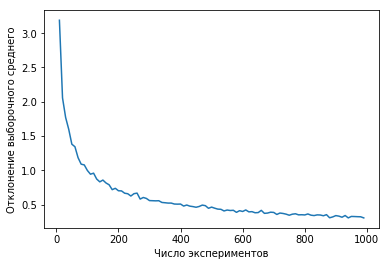

In [3]:
# TODO: оценить зависимость дисперсии 
#       от числа примеров в эксперименте
#       (построить график)

ans = []
for n in range(10,1000,10):
    exp = gen_experiments(n_samples=n)
    _ = exp.mean(axis = 1).std()
    ans.append(_)

# Строим график    
_ = plt.plot(np.arange(10,1000,10), ans)
_ = plt.xlabel('Число экспериментов')
_ = plt.ylabel('Отклонение выборочного среднего')

## Доверительный интервал для среднего

In [4]:
# TODO: построить доверительный интервал для n_samples=10
#       при уровне значимости 0.975 (95%)

In [5]:
sample = gen_experiments()               # генерим выборку с mean =  0 и std = 10
standart_sample = sample / sample.std()  # Операция стандартизации
means = standart_sample.mean(axis = 1)   # Считаем среднее для каждого эксперимента
std = means.std()                        # Считаем std средних

In [6]:
std

0.30474843204058055

In [7]:
# Строим доверительный интервал
confidence = 0.975
z = st.norm.ppf(confidence, scale = 10)

margin = z * std

print('z: %s' % z)
print('margin: %s' % margin)
print('interval: %s %s' % (- margin, margin))

z: 19.59963984540054
margin: 5.972959511445901
interval: -5.972959511445901 5.972959511445901


In [8]:
# TODO: провести эксперимент и показать корректность полученного интервала 
# (провести 100 экспериментов и убедиться, что примерно 95 средних из 100 попадают 
# в построенный доверительный интервал)

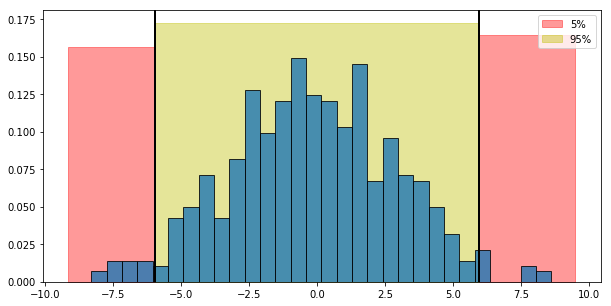

In [9]:

plt.hist(sample.mean(axis=1), edgecolor = 'k', lw=1, bins=30, density=True, alpha = 0.8)
plt.axvline(margin, color = 'k', lw=2)
plt.axvline(-margin, color = 'k', lw=2)
plt.fill_betweenx(np.linspace(plt.ylim()[0], plt.ylim()[1]), plt.xlim()[0], -margin, alpha = .4, color = 'r', label = '5%')
plt.fill_betweenx(np.linspace(plt.ylim()[0], plt.ylim()[1]), margin, plt.xlim()[1], alpha = .4, color = 'r')

plt.fill_betweenx(np.linspace(plt.ylim()[0], plt.ylim()[1]), -margin, margin, alpha = .4, color = 'y', label = '95%')

plt.legend()

plt.gcf().set_size_inches(10,5)

In [25]:
# Доля средних, попадающих в доверительный интервал (500 экспериментов)
sample[abs(sample.mean(axis = 1)) <= margin  ].shape[0] / sample.shape[0]

0.954

In [57]:
# Доля средних, попадающих в доверительный интервал (1000 экспериментов)
sample = gen_experiments(n_experiments=1000, n_samples=10) 
sample[abs(sample.mean(axis = 1)) <= margin  ].shape[0] / sample.shape[0]

0.952